#1.Загрузка данных

In [ ]:
!pip install -U --no-cache-dir gdown --pre
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler #

In [ ]:
# Скачиваем аданные
# Перечень задач
!gdown --no-cookies --fuzzy https://docs.google.com/spreadsheets/d/1V4svGz2zl-mQ6fDO3ILxMk1vCT9VhcW3/edit?usp=sharing&ouid=106906074132043001509&rtpof=true&sd=true&export=download
# attr.csv
!gdown --no-cookies --fuzzy https://drive.google.com/file/d/1iyYykIKfNBiL8AaWpAOEMzjJhnX1Yhy7/view?usp=sharing&export=download
# dataset_hackaton_ksg__v2__23062023__1710_GMT3.csv
!gdown --no-cookies --fuzzy https://drive.google.com/file/d/170l6ErewO2Y8k7C7hSN3yjGpW64pCuOT/view?usp=sharing&export=download
# dataset_ksg.csv
!gdown --no-cookies --fuzzy https://drive.google.com/file/d/1qwc48BlsuAlYy70_kWbNt_n8fA7vb3-I/view?usp=sharing&export=download

Downloading...
From: https://drive.google.com/uc?id=1V4svGz2zl-mQ6fDO3ILxMk1vCT9VhcW3
To: /content/Перечень задач.xlsx
100% 10.5k/10.5k [00:00<00:00, 32.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iyYykIKfNBiL8AaWpAOEMzjJhnX1Yhy7
To: /content/attr.csv
100% 215k/215k [00:00<00:00, 121MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=170l6ErewO2Y8k7C7hSN3yjGpW64pCuOT
From (redirected): https://drive.google.com/uc?id=170l6ErewO2Y8k7C7hSN3yjGpW64pCuOT&confirm=t&uuid=a91f162b-4b07-4e6c-a271-59b4f4573404
To: /content/dataset_hackaton_ksg__v2__23062023__1710_GMT3.csv
100% 246M/246M [00:02<00:00, 119MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1qwc48BlsuAlYy70_kWbNt_n8fA7vb3-I
From (redirected): https://drive.google.com/uc?id=1qwc48BlsuAlYy70_kWbNt_n8fA7vb3-I&confirm=t&uuid=1e886799-be4d-4184-9485-227a33bfe020
To: /content/dataset_ksg.csv
100% 107M/107M [00:00<00:00, 132MB/s] 


#2.Обработка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #

In [ ]:
# Загружаем файлы
df_task = pd.read_excel('/content/Перечень задач.xlsx')
df_attr = pd.read_csv('/content/attr.csv')
df_ksg = pd.read_csv('/content/dataset_ksg.csv')
df = pd.read_csv('/content/dataset_hackaton_ksg__v2__23062023__1710_GMT3.csv', sep=';')

<ipython-input-5-1b798ff4f334>:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset_hackaton_ksg__v2__23062023__1710_GMT3.csv', sep=';')


In [ ]:
df_attr

,obj_key,состояние площадки,Площадь,Генпроектировщик,Генподрядчик,Кол-во рабочих,date_report
0,022-0170,"Свободна, передана",16402.54,1,2,271.0,2023.01.20
1,022-0526,NaN,18100.00,0,0,NaN,2023.01.20
2,022-0527,Не передана,9850.00,0,0,NaN,2023.01.20
3,022-0522,Не передана,13260.00,0,0,NaN,2023.01.20
4,022-0355,Не передана под снос (для объектов сноса),NaN,1,2,NaN,2023.01.20
...,...,...,...,...,...,...,...
3431,020-0156,Занята,13288.00,21,15,NaN,2023.06.04
3432,019-0676,"Свободна, не передана",6291.00,29,20,181.0,2023.06.04
3433,019-0674,Занята,9030.00,6,0,NaN,2023.06.04
3434,020-0157,Занята,7243.90,30,7,63.0,2023.06.04


In [ ]:
# Объединяем данные по столбцам даты отчёта и кода объекта
merged_df = pd.merge(df, df_attr, on=['date_report', 'obj_key'])

In [ ]:
merged_df.head(1)

,Unnamed: 0,№ п/п,obj_prg,obj_subprg,obj_key,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,ДатаначалаБП0,ДатаокончанияБП0,Статуспоэкспертизе,Экспертиза,date_report,состояние площадки,Площадь,Генпроектировщик,Генподрядчик,Кол-во рабочих
0,0,79,Образование,Общеобразовательные учреждения,022-0524,1,Предпроектные работы,0.0,2022-01-14,2022-09-22,NaN,NaN,NaN,NaN,2023.02.13,Занята,6800.0,0,0,NaN


In [ ]:
# сравнение названий столбцов
missing_columns_df1 = set(merged_df.columns) - set(df_ksg.columns)
missing_columns_df2 = set(df_ksg.columns) - set(merged_df.columns)

# вывод списка отсутствующих столбцов для каждого датасета
print('Отсутствующие столбцы в df_ksg:', missing_columns_df1)
print('Отсутствующие столбцы в merged_df:', missing_columns_df2)

# В merged_df наибольшее количество столбцов поэтому работаем с ним

Отсутствующие столбцы в df_ksg: {'Площадь', 'Генподрядчик', 'Unnamed: 0', 'состояние площадки', 'Кол-во рабочих', 'Генпроектировщик'}
Отсутствующие столбцы в merged_df: set()


In [ ]:
# Заполним все пропуски нулями
merged_df.fillna(0, inplace=True)

# Преобразуем столбцы дат в формат даты
merged_df[['ДатаНачалаЗадачи', 'ДатаОкончанияЗадачи', 'date_report']] = merged_df[['ДатаНачалаЗадачи', 'ДатаОкончанияЗадачи', 'date_report']].apply(pd.to_datetime)
merged_df[['ДатаначалаБП0', 'ДатаокончанияБП0']] = merged_df[['ДатаначалаБП0', 'ДатаокончанияБП0']].apply(pd.to_datetime)

# Вычисляем количество дней на выполнение этапа
merged_df['ФактСтрокВып_дн'] = merged_df['ДатаОкончанияЗадачи'] - merged_df['ДатаНачалаЗадачи']
merged_df['СтрокВыпДог_дн'] = merged_df['ДатаокончанияБП0'] - merged_df['ДатаначалаБП0']

# Переведем в строковые значения
merged_df['ФактСтрокВып_дн'] = merged_df['ФактСтрокВып_дн'].astype(str)
merged_df['СтрокВыпДог_дн'] = merged_df['СтрокВыпДог_дн'].astype(str)

# Создадим списки дней
list_fact = merged_df['ФактСтрокВып_дн'].to_list()
list_doc = merged_df['СтрокВыпДог_дн'].to_list()

# Преобразовываем дни в формат int
new_list_fact = []
for i in list_fact:
    i = i.split(' ')
    i = i[0]
    new_list_fact.append(i)

merged_df['ФактСтрокВып_дн'] = new_list_fact

new_list_doc = []
for i in list_doc:
    i = i.split(' ')
    i = i[0]
    new_list_doc.append(i)

merged_df['СтрокВыпДог_дн'] = new_list_doc

merged_df['ФактСтрокВып_дн'] = merged_df['ФактСтрокВып_дн'].astype(int)
merged_df['СтрокВыпДог_дн'] = merged_df['СтрокВыпДог_дн'].astype(int)

# Создадим новый столбец с данными из столбцов obj_key Кодзадачи НазваниеЗадачи
merged_df['obj_tasks'] = merged_df['obj_key'].astype(str) + " " + merged_df['Кодзадачи'].astype(str) + " " + merged_df['НазваниеЗадачи'].astype(str)
# Создадим новый столбец с данными из столбцов obj_prg, obj_subprg, Кодзадачи, НазваниеЗадачи
merged_df['obj_tasks_subprg'] = merged_df['obj_prg'].astype(str) + " " + merged_df['obj_subprg'].astype(str) + " " + merged_df['Кодзадачи'].astype(str) + " " + merged_df['НазваниеЗадачи'].astype(str)+ " " + merged_df['состояние площадки'].astype(str)

# Переведём статус экспертизы к числовому формату
merged_df['Экспертиза'] = merged_df['Экспертиза'].replace({'1ТС': 1, '2ТС': 2, '2С': 3, '2Т': 4, '1Т': 5, '1С': 6}) # [0, '1ТС', '2ТС', '2С', '2Т', '1Т', '1С']


In [ ]:
merged_df.iloc[:, 0:10]

,Unnamed: 0,№ п/п,obj_prg,obj_subprg,obj_key,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи
0,0,79,Образование,Общеобразовательные учреждения,022-0524,1,Предпроектные работы,0.0,2022-01-14,2022-09-22
1,73,79,Образование,Общеобразовательные учреждения,022-0524,1.0,Нетиповая задача для блока Предпроектные работы,0.0,2022-09-22,2022-09-22
2,109,79,Образование,Общеобразовательные учреждения,022-0524,1.1,Объект включен в АИП,0.0,2022-01-14,2022-01-14
3,165,79,Образование,Общеобразовательные учреждения,022-0524,1.2,Выпуск ГПЗУ,0.0,2022-01-14,2022-02-24
4,241,79,Образование,Общеобразовательные учреждения,022-0524,1.2.1,Подача заявки на получение ГПЗУ,0.0,2022-01-14,2022-01-14
...,...,...,...,...,...,...,...,...,...,...
387147,58068,77,Образование,Общеобразовательные учреждения,022-0355,7.1.5,Получение Акта итоговой проверки,0.0,2023-07-01,2023-07-30
387148,59153,77,Образование,Общеобразовательные учреждения,022-0355,7.4.5,Итоговый акт приемки работ,0.0,2023-07-30,2023-07-30
387149,63496,86,Образование,Общеобразовательные учреждения,023-0093,0,0,0.0,1970-01-01,1970-01-01
387150,63497,87,Образование,Общеобразовательные учреждения,023-0091,0,0,0.0,1970-01-01,1970-01-01


In [ ]:
merged_df.iloc[:, 0:10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387152 entries, 0 to 387151
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               387152 non-null  int64         
 1   № п/п                    387152 non-null  int64         
 2   obj_prg                  387152 non-null  object        
 3   obj_subprg               387152 non-null  object        
 4   obj_key                  387152 non-null  object        
 5   Кодзадачи                387152 non-null  object        
 6   НазваниеЗадачи           387152 non-null  object        
 7   ПроцентЗавершенияЗадачи  387152 non-null  float64       
 8   ДатаНачалаЗадачи         387152 non-null  datetime64[ns]
 9   ДатаОкончанияЗадачи      387152 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 32.5+ MB


In [ ]:
merged_df.iloc[:, 10:]

,ДатаначалаБП0,ДатаокончанияБП0,Статуспоэкспертизе,Экспертиза,date_report,состояние площадки,Площадь,Генпроектировщик,Генподрядчик,Кол-во рабочих,ФактСтрокВып_дн,СтрокВыпДог_дн,obj_tasks,obj_tasks_subprg
0,1970-01-01,1970-01-01,0.0,0,2023-02-13,Занята,6800.0,0,0,0.0,251,0,022-0524 1 Предпроектные работы,Образование Общеобразовательные учреждения 1 П...
1,1970-01-01,1970-01-01,0.0,0,2023-02-13,Занята,6800.0,0,0,0.0,0,0,022-0524 1.0 Нетиповая задача для блока Предпр...,Образование Общеобразовательные учреждения 1.0...
2,1970-01-01,1970-01-01,0.0,0,2023-02-13,Занята,6800.0,0,0,0.0,0,0,022-0524 1.1 Объект включен в АИП,Образование Общеобразовательные учреждения 1.1...
3,1970-01-01,1970-01-01,0.0,0,2023-02-13,Занята,6800.0,0,0,0.0,41,0,022-0524 1.2 Выпуск ГПЗУ,Образование Общеобразовательные учреждения 1.2...
4,1970-01-01,1970-01-01,0.0,0,2023-02-13,Занята,6800.0,0,0,0.0,0,0,022-0524 1.2.1 Подача заявки на получение ГПЗУ,Образование Общеобразовательные учреждения 1.2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387147,2023-06-01,2023-06-30,0.0,0,2023-05-29,Передана под снос (для объектов сноса),0.0,1,2,6.0,29,29,022-0355 7.1.5 Получение Акта итоговой проверки,Образование Общеобразовательные учреждения 7.1...
387148,2023-06-30,2023-06-30,0.0,0,2023-05-29,Передана под снос (для объектов сноса),0.0,1,2,6.0,0,0,022-0355 7.4.5 Итоговый акт приемки работ,Образование Общеобразовательные учреждения 7.4...
387149,1970-01-01,1970-01-01,0.0,0,2023-05-29,Не передана,17000.0,0,0,0.0,0,0,023-0093 0 0,Образование Общеобразовательные учреждения 0 0...
387150,1970-01-01,1970-01-01,0.0,0,2023-05-29,0,17000.0,0,0,0.0,0,0,023-0091 0 0,Образование Общеобразовательные учреждения 0 0 0


In [ ]:
merged_df.iloc[:, 10:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387152 entries, 0 to 387151
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ДатаначалаБП0       387152 non-null  datetime64[ns]
 1   ДатаокончанияБП0    387152 non-null  datetime64[ns]
 2   Статуспоэкспертизе  387152 non-null  float64       
 3   Экспертиза          387152 non-null  int64         
 4   date_report         387152 non-null  datetime64[ns]
 5   состояние площадки  387152 non-null  object        
 6   Площадь             387152 non-null  float64       
 7   Генпроектировщик    387152 non-null  int64         
 8   Генподрядчик        387152 non-null  int64         
 9   Кол-во рабочих      387152 non-null  float64       
 10  ФактСтрокВып_дн     387152 non-null  int64         
 11  СтрокВыпДог_дн      387152 non-null  int64         
 12  obj_tasks           387152 non-null  object        
 13  obj_tasks_subprg    387152 no

In [ ]:
merged_df['Экспертиза'].unique() #obj_key

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
merged_df['obj_key'].unique() # merged_

array(['022-0524', '022-0354', '022-0526', '019-0594', '019-0675',
       '020-0710', '019-0430', '022-0170', '020-0156', '019-0429',
       '019-0428', '020-0709', '020-0157', '020-0711', '019-0676',
       '019-0431', '020-0720', '020-0708', '020-0683', '017-0527',
       '020-0155', '021-0048', '022-0176', '019-0674', '021-0781',
       '022-0522', '022-0527', '022-0528', '022-0355', '022-0525',
       '023-0093', '023-0091', '023-0089'], dtype=object)

In [ ]:
merged_df

,Unnamed: 0,№ п/п,obj_prg,obj_subprg,obj_key,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,...,date_report,состояние площадки,Площадь,Генпроектировщик,Генподрядчик,Кол-во рабочих,ФактСтрокВып_дн,СтрокВыпДог_дн,obj_tasks,obj_tasks_subprg
0,0,79,Образование,Общеобразовательные учреждения,022-0524,1,Предпроектные работы,0.0,2022-01-14,2022-09-22,...,2023-02-13,Занята,6800.0,0,0,0.0,251,0,022-0524 1 Предпроектные работы,Образование Общеобразовательные учреждения 1 П...
1,73,79,Образование,Общеобразовательные учреждения,022-0524,1.0,Нетиповая задача для блока Предпроектные работы,0.0,2022-09-22,2022-09-22,...,2023-02-13,Занята,6800.0,0,0,0.0,0,0,022-0524 1.0 Нетиповая задача для блока Предпр...,Образование Общеобразовательные учреждения 1.0...
2,109,79,Образование,Общеобразовательные учреждения,022-0524,1.1,Объект включен в АИП,0.0,2022-01-14,2022-01-14,...,2023-02-13,Занята,6800.0,0,0,0.0,0,0,022-0524 1.1 Объект включен в АИП,Образование Общеобразовательные учреждения 1.1...
3,165,79,Образование,Общеобразовательные учреждения,022-0524,1.2,Выпуск ГПЗУ,0.0,2022-01-14,2022-02-24,...,2023-02-13,Занята,6800.0,0,0,0.0,41,0,022-0524 1.2 Выпуск ГПЗУ,Образование Общеобразовательные учреждения 1.2...
4,241,79,Образование,Общеобразовательные учреждения,022-0524,1.2.1,Подача заявки на получение ГПЗУ,0.0,2022-01-14,2022-01-14,...,2023-02-13,Занята,6800.0,0,0,0.0,0,0,022-0524 1.2.1 Подача заявки на получение ГПЗУ,Образование Общеобразовательные учреждения 1.2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387147,58068,77,Образование,Общеобразовательные учреждения,022-0355,7.1.5,Получение Акта итоговой проверки,0.0,2023-07-01,2023-07-30,...,2023-05-29,Передана под снос (для объектов сноса),0.0,1,2,6.0,29,29,022-0355 7.1.5 Получение Акта итоговой проверки,Образование Общеобразовательные учреждения 7.1...
387148,59153,77,Образование,Общеобразовательные учреждения,022-0355,7.4.5,Итоговый акт приемки работ,0.0,2023-07-30,2023-07-30,...,2023-05-29,Передана под снос (для объектов сноса),0.0,1,2,6.0,0,0,022-0355 7.4.5 Итоговый акт приемки работ,Образование Общеобразовательные учреждения 7.4...
387149,63496,86,Образование,Общеобразовательные учреждения,023-0093,0,0,0.0,1970-01-01,1970-01-01,...,2023-05-29,Не передана,17000.0,0,0,0.0,0,0,023-0093 0 0,Образование Общеобразовательные учреждения 0 0...
387150,63497,87,Образование,Общеобразовательные учреждения,023-0091,0,0,0.0,1970-01-01,1970-01-01,...,2023-05-29,0,17000.0,0,0,0.0,0,0,023-0091 0 0,Образование Общеобразовательные учреждения 0 0 0


#3.Предподготовка текстовых данных Keras/Tf

In [ ]:
from tensorflow.keras.models import Sequential, Model #
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел
import math # Для округления
#import os #Для работы с файлами
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output

In [ ]:
texts = merged_df['obj_tasks_subprg'].values # Извлекаем данные всех текстов из столбца 'Текст Сообщения'
maxWordsCount = 2200

In [ ]:
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#Для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
#num_words=maxWordsCount - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n' - избавляемся от ненужных символов
#lower=True - приводим слова к нижнему регистру
#split=' ' - разделяем слова по пробелу
#char_level=False - просим токенайзер не удалять однобуквенные слова
tokenizer = Tokenizer(num_words=maxWordsCount, lower=True, split=' ', oov_token='unknown', char_level=False)#False #filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n'

tokenizer.fit_on_texts(texts) # Даём в обработку наши тексты, методу, который соберет словарь частотности

# Формируем матрицу индексов по принципу Bag of Words
train_text = tokenizer.texts_to_matrix(texts) # Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой

In [ ]:
items = list(tokenizer.word_index.items()) # Присвоим каждому слову индекс

In [ ]:
items[:10]

[('unknown', 1),
 ('образование', 2),
 ('общеобразовательные', 3),
 ('учреждения', 4),
 ('передана', 5),
 ('3', 6),
 ('2', 7),
 ('свободна', 8),
 ('1', 9),
 ('4', 10)]

In [ ]:
#преобразовываем текст в последовательность индексов согласно частотному словарю
train_text_Indexes = tokenizer.texts_to_sequences(texts) #обучающие тесты в индексы

In [ ]:
print(train_text.shape)  # Посмотрим на форму текстов
print(train_text[0][0:100])# И отдельно на фрагмент начала вектора

# Посмотрим размер словаря
print("Размер словаря", len(tokenizer.word_index.items()))

(387152, 2200)
[0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Размер словаря 2123


In [ ]:
n = 0
print(train_text[n])       # Текст
print(train_text_Indexes[n]) # Вектор индексов слов текста

[0. 0. 1. ... 0. 0. 0.]
[2, 3, 4, 9, 775, 41, 13]


In [ ]:
xTrain_text = np.array(train_text[:20000])
yTrain = np.array(merged_df['ФактСтрокВып_дн'][:20000])
x_train2 = np.array(merged_df[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']][:20000])

In [ ]:
# В качестве нормализации данных используем готовую библиотеку
yScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
yScaler.fit(yTrain.reshape(-1, 1))

# Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1))

print(yTrainScaled.shape)
print(yTrain[1])
print(yTrainScaled[1])

(20000, 1)
0
[-0.5860595]


In [ ]:
# В качестве нормализации данных используем готовую библиотеку
xScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
xScaler.fit(x_train2.reshape(-1, 1))

# Нормализуем по нормальному распределению
xTrainScaled = xScaler.transform(x_train2.reshape(-1, 1))

print(xTrainScaled.shape)
print(x_train2[1])
print(xTrainScaled[1])

(140000, 1)
[   0.    0.    0. 6800.    0.    0.    0.]
[-0.37814656]


#4. Обучение НС

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint # Для колбека
# Сохраняем только лучший вариант сети
callbacks = [ModelCheckpoint('/content/drive/MyDrive/4. Кейс №2 Дип.г.Москва/model/keras_tf/Dip_MSK.hdf5', monitor='val_loss', save_best_only=True)]

In [ ]:
xTrain_text.shape[1]

2500

In [ ]:
input1 = Input((xTrain_text.shape[1],))
#input2 = Input((xTrainProf01.shape[1],))
input3 = Input((xTrainScaled.shape[1],))

x1 = BatchNormalization()(input1) # Создаем ветку х1
x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation = "relu")(x1)

#x2 = BatchNormalization()(input2) # Создаем ветку х2
#x2 = Dense(25, activation="relu")(input2)
#x2 = Dense(8, activation="tanh")(x2)
#x2 = Dense(5, activation = "elu")(x2)

x3 = BatchNormalization()(input3) # Создаем ветку х3
x3 = Dense(1000, activation="tanh")(input3)
x3 = Dense(20, activation = "elu")(x3)
x3 = Dense(5, activation = "elu")(x3)

x = concatenate([x1, x3]) # Объединяем все три ветки

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='relu')(x) # Финальный нейрон, делает регрессию

model = Model((input1, input3), x) # В Model загружаем стартовые и последнюю точки

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model.fit([xTrain_text[:15000], xTrainScaled[:15000]],
                    yTrainScaled[:15000],
                    epochs= 150,
                    validation_data=([xTrain_text[15000:20000], xTrainScaled[15000:20000]],
                    yTrainScaled[15000:20000]),
                    verbose=1,
                    callbacks = callbacks,
                    shuffle=True)

Epoch 1/150
469/469 [==============================] - 8s 7ms/step - loss: 1.0128 - mae: 0.6576 - val_loss: 0.9571 - val_mae: 0.6523
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.9352 - mae: 0.6641 - val_loss: 0.7786 - val_mae: 0.6403
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.8562 - mae: 0.6515 - val_loss: 0.8836 - val_mae: 0.6964
Epoch 4/150
469/469 [==============================] - 4s 8ms/step - loss: 0.8395 - mae: 0.6503 - val_loss: 0.8236 - val_mae: 0.6659
Epoch 5/150
469/469 [==============================] - 3s 7ms/step - loss: 0.8029 - mae: 0.6422 - val_loss: 0.7514 - val_mae: 0.6489
Epoch 6/150
469/469 [==============================] - 3s 6ms/step - loss: 0.8048 - mae: 0.6428 - val_loss: 0.8336 - val_mae: 0.6702
Epoch 7/150
469/469 [==============================] - 3s 6ms/step - loss: 0.7899 - mae: 0.6420 - val_loss: 0.8347 - val_mae: 0.6722
Epoch 8/150
469/469 [==============================] - 4s 8ms/step - 

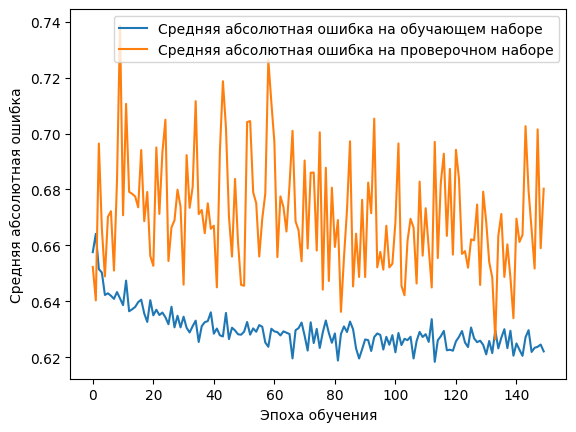

In [ ]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 2200)]       0           []                               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 2200)        8800        ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dropout_2 (Dropout)            (None, 2200)         0           ['batch_normalization_2[0][0]']  
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                         

157/157 [==============================] - 1s 3ms/step


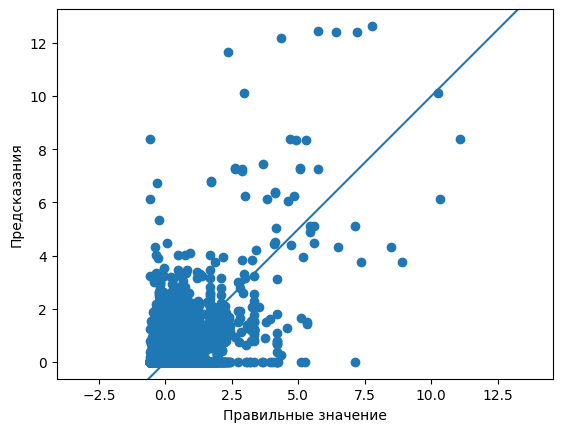

In [ ]:
yy = yTrainScaled[15000:20000] # Дни
pred = model.predict([xTrain_text[15000:20000], xTrainScaled[15000:20000]]) # Предсказанные дни
plt.scatter(yy, pred)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000])
plt.show()

#5.Загрузка модели для предикта

In [ ]:
# Скачиваем веса модели
!gdown --no-cookies --fuzzy https://drive.google.com/file/d/1xC8Y5E8RoR9CvZa-vWVkL48ISUCQ90b9/view?usp=sharing&export=download

Downloading...
From: https://drive.google.com/uc?id=1xC8Y5E8RoR9CvZa-vWVkL48ISUCQ90b9
To: /content/Dip_MSK.hdf5
100% 2.03M/2.03M [00:00<00:00, 171MB/s]


In [ ]:
from tensorflow.keras.models import load_model
# Загружаем модель
model = load_model("/content/Dip_MSK.hdf5")

## На этапе предобработки тестового файла для предикта моделью возникли трудности на решение которых уже не оставалось времени.

**Поэтому предикт был выполнен на ранее предобработанном файле в пределах среза от 20к до 25к строк. Обучение НС происходило на данных до 20к строк из датафрейма merged_df**

In [ ]:
# Загрузим пример проверочной выбрки
!gdown --no-cookies --fuzzy https://docs.google.com/spreadsheets/d/1T75q9F_z1MouECBRyotz-uw59j9uATes/edit?usp=sharing&ouid=106906074132043001509&rtpof=true&sd=true&export=download

Downloading...
From: https://drive.google.com/uc?id=1T75q9F_z1MouECBRyotz-uw59j9uATes
To: /content/Пример_теста_2023.06.19.xlsx
100% 10.1k/10.1k [00:00<00:00, 30.0MB/s]


In [ ]:
df_test = pd.read_excel('/content/Пример_теста_2023.06.19.xlsx')

In [ ]:
# Заполним все пропуски нулями
df_test.fillna(0, inplace=True)

In [ ]:
# Посмотрим каких столбцов не хватает
missing_columns_df1 = set(merged_df.columns) - set(df_test.columns)
missing_columns_df2 = set(df_test.columns) - set(merged_df.columns)

# вывод списка отсутствующих столбцов для каждого датасета
print('Отсутствующие столбцы в df_test:', missing_columns_df1)
print('Отсутствующие столбцы в merged_df:', missing_columns_df2)

Отсутствующие столбцы в df_test: {'Площадь', 'Генподрядчик', 'Unnamed: 0', 'obj_tasks', 'obj_tasks_subprg', 'состояние площадки', 'ФактСтрокВып_дн', 'date_report', 'СтрокВыпДог_дн', 'Кол-во рабочих', 'Генпроектировщик'}
Отсутствующие столбцы в merged_df: {'obj_pwa_key', 'obj_shortName'}


In [ ]:
df_test

,№ п/п,obj_prg,obj_subprg,obj_key,obj_pwa_key,obj_shortName,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,ДатаначалаБП0,ДатаокончанияБП0,Статуспоэкспертизе,Экспертиза
0,36,Образование,Дошкольные учреждения,020-0684,fea30a7e-2f12-ec11-972f-80d21df2d922,"ДОУ на 125, ТПУ ""Мневники""",1,Предпроектные работы,0,2020-11-03,2022-02-01,2020-11-03,2021-12-29,0.0,0.0


In [ ]:
merged_test = pd.merge(df_test, merged_df, on=['№ п/п', 'obj_prg', 'obj_subprg', 'obj_key', 'Кодзадачи', 'НазваниеЗадачи', 'ПроцентЗавершенияЗадачи', 'ДатаНачалаЗадачи', 'ДатаОкончанияЗадачи', 'ДатаначалаБП0', 'ДатаокончанияБП0', 'Статуспоэкспертизе', 'Экспертиза'], how='outer')

<ipython-input-93-473c3654bcce>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merged_test = pd.merge(df_test, merged_df, on=['№ п/п', 'obj_prg', 'obj_subprg', 'obj_key', 'Кодзадачи', 'НазваниеЗадачи', 'ПроцентЗавершенияЗадачи', 'ДатаНачалаЗадачи', 'ДатаОкончанияЗадачи', 'ДатаначалаБП0', 'ДатаокончанияБП0', 'Статуспоэкспертизе', 'Экспертиза'], how='outer')


In [ ]:
# Выберим только первую нужную нам строку, т.к. остальные были сгенерированы при объединении
df_test_p = merged_test.iloc[0]

In [ ]:
df_test_p

№ п/п                                                        36
obj_prg                                             Образование
obj_subprg                                Дошкольные учреждения
obj_key                                                020-0684
obj_pwa_key                fea30a7e-2f12-ec11-972f-80d21df2d922
obj_shortName                        ДОУ на 125, ТПУ "Мневники"
Кодзадачи                                                   1.0
НазваниеЗадачи                             Предпроектные работы
ПроцентЗавершенияЗадачи                                     0.0
ДатаНачалаЗадачи                            2020-11-03 00:00:00
ДатаОкончанияЗадачи                         2022-02-01 00:00:00
ДатаначалаБП0                               2020-11-03 00:00:00
ДатаокончанияБП0                            2021-12-29 00:00:00
Статуспоэкспертизе                                          0.0
Экспертиза                                                  0.0
Unnamed: 0                              

In [ ]:
  # Преобразуем столбцы дат в формат даты
  #df_test_p[['ДатаНачалаЗадачи', 'ДатаОкончанияЗадачи', 'date_report']] = df_test_p[['ДатаНачалаЗадачи', 'ДатаОкончанияЗадачи', 'date_report']].apply(pd.to_datetime)
  #df_test_p[['ДатаначалаБП0', 'ДатаокончанияБП0']] = df_test_p[['ДатаначалаБП0', 'ДатаокончанияБП0']].apply(pd.to_datetime)

  # Вычисляем количество дней на выполнение этапа
  #df_test_p['ФактСтрокВып_дн'] = df_test_p['ДатаОкончанияЗадачи'] - df_test_p['ДатаНачалаЗадачи']
  #df_test_p['СтрокВыпДог_дн'] = df_test_p['ДатаокончанияБП0'] - df_test_p['ДатаначалаБП0']

  # Переведем в строковые значения
  #df_test_p['ФактСтрокВып_дн'] = df_test_p['ФактСтрокВып_дн'].astype(str)
  #df_test_p['СтрокВыпДог_дн'] = df_test_p['СтрокВыпДог_дн'].astype(str)

  # Создадим списки дней
  #list_fact = df_test_p['ФактСтрокВып_дн'].to_list()
  #list_doc = df_test_p['СтрокВыпДог_дн'].to_list()

  # Преобразовываем дни в формат int
  new_list_fact = []
  for i in list_fact:
      i = i.split(' ')
      i = i[0]
      new_list_fact.append(i)

  df_test_p['ФактСтрокВып_дн'] = new_list_fact

  new_list_doc = []
  for i in list_doc:
      i = i.split(' ')
      i = i[0]
      new_list_doc.append(i)

  df_test_p['СтрокВыпДог_дн'] = new_list_doc

  df_test_p['ФактСтрокВып_дн'] = df_test_p['ФактСтрокВып_дн'].astype(int)
  df_test_p['СтрокВыпДог_дн'] = df_test_p['СтрокВыпДог_дн'].astype(int)

In [ ]:
df_test_p['obj_tasks'] = df_test_p['obj_key'] + " " + df_test_p['Кодзадачи'] + " " + df_test_p['НазваниеЗадачи']

In [ ]:
df_test_p.fillna(0, inplace=True)

# Создадим новый столбец с данными из столбцов obj_key Кодзадачи НазваниеЗадачи
df_test_p['obj_tasks'] = df_test_p['obj_key'].astype(str) + " " + df_test_p['Кодзадачи'].astype(str) + " " + df_test_p['НазваниеЗадачи'].astype(str)
# Создадим новый столбец с данными из столбцов obj_prg, obj_subprg, Кодзадачи, НазваниеЗадачи
df_test_p['obj_tasks_subprg'] = df_test_p['obj_prg'].astype(str) + " " + df_test_p['obj_subprg'].astype(str) + " " + df_test_p['Кодзадачи'].astype(str) + " " + df_test_p['НазваниеЗадачи'].astype(str)+ " " + df_test_p['состояние площадки'].astype(str)

# Переведём статус экспертизы к числовому формату
df_test_p['Экспертиза'] = df_test_p['Экспертиза'].replace({'1ТС': 1, '2ТС': 2, '2С': 3, '2Т': 4, '1Т': 5, '1С': 6}) # [0, '1ТС', '2ТС', '2С', '2Т', '1Т', '1С']

# Предобработаем данные для НС
test_txt = np.array(df_test_p['obj_tasks_subprg']) # Переводим сообщения в массив
x_texts = tokenizer.texts_to_matrix(test_txt) # Токенизируем массив
x_numbers = np.array(df_test_p[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']])

In [ ]:
# Функция обработки тестового набора
def pars(df_test_p):
  df_test_p.fillna(0, inplace=True)

  # Создадим новый столбец с данными из столбцов obj_key Кодзадачи НазваниеЗадачи
  df_test_p['obj_tasks'] = df_test_p['obj_key'].astype(str) + " " + df_test_p['Кодзадачи'].astype(str) + " " + df_test_p['НазваниеЗадачи'].astype(str)
  # Создадим новый столбец с данными из столбцов obj_prg, obj_subprg, Кодзадачи, НазваниеЗадачи
  df_test_p['obj_tasks_subprg'] = df_test_p['obj_prg'].astype(str) + " " + df_test_p['obj_subprg'].astype(str) + " " + df_test_p['Кодзадачи'].astype(str) + " " + df_test_p['НазваниеЗадачи'].astype(str)+ " " + df_test_p['состояние площадки'].astype(str)

  # Переведём статус экспертизы к числовому формату
  df_test_p['Экспертиза'] = df_test_p['Экспертиза'].replace({'1ТС': 1, '2ТС': 2, '2С': 3, '2Т': 4, '1Т': 5, '1С': 6}) # [0, '1ТС', '2ТС', '2С', '2Т', '1Т', '1С']

  # Предобработаем данные для НС
  test_txt = np.array(df_test_p['obj_tasks_subprg']) # Переводим сообщения в массив
  x_texts = tokenizer.texts_to_matrix(test_txt) # Токенизируем массив
  x_numbers = np.array(df_test_p[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']])

  return x_texts, x_numbers

In [ ]:
x1, x2 = pars(df_test_p)

#6.Predict

**В качестве предикта будем использовать срез обработанного файла +5к от того среза на котором была обучена модель**

In [ ]:
x_text = np.array(train_text[20000:25000])
x_numb = np.array(merged_df[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']][20000:25000])

In [ ]:
x_numb.shape

(5000, 7)

In [ ]:
# В качестве нормализации данных используем готовую библиотеку
x_2_Scaler = StandardScaler()

# Скармливаем объекту двумерный вектор
x_2_Scaler.fit(x_numb.reshape(-1, 1))

# Нормализуем по нормальному распределению
x_2_TrainScaled = x_2_Scaler.transform(x_numb.reshape(-1, 1))

print(x_2_TrainScaled.shape)
print(x_numb[1])
print(x_2_TrainScaled[1])

(35000, 1)
[0.00e+00 0.00e+00 0.00e+00 9.03e+03 6.00e+00 0.00e+00 0.00e+00]
[-0.37911599]


In [ ]:
# Выполняем предикт
pred_test = model.predict([x_text[:5000], x_2_TrainScaled[:5000]])

157/157 [==============================] - 1s 3ms/step


In [ ]:
yTrain_pred = np.array(merged_df['ФактСтрокВып_дн'][20000:25000])

In [ ]:
# Приводим его к начальному виду
predUnscaled = yScaler.inverse_transform(pred_test).flatten()

# Среднее значение ошибки
delta = predUnscaled - yTrain_pred
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

58.52520786895752


In [ ]:
pred_df = merged_df[20000:25000]
pred_df['Предсказано дн. на задачу'] = predUnscaled

<ipython-input-143-4906dbbe1311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Предсказано дн. на задачу'] = predUnscaled


In [ ]:
pred_df['Предсказано дн. на задачу'] = predUnscaled
pred_df['Предсказано дн. на задачу'] = pred_df['Предсказано дн. на задачу'].astype(int)

<ipython-input-144-4566e1cd7a60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Предсказано дн. на задачу'] = predUnscaled
<ipython-input-144-4566e1cd7a60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Предсказано дн. на задачу'] = pred_df['Предсказано дн. на задачу'].astype(int)


In [ ]:
pred_df['Предсказано дн. на задачу'].unique()

array([ 70, 101, 571, 150, 109, 113, 126, 100, 157, 258,  75,  96, 302,
       365, 310, 384,  88, 426, 413, 442, 502, 402, 688, 208, 324, 166,
       185, 148, 186, 253, 211, 179, 350, 159, 173, 283, 181, 180, 244,
       190, 187, 240,  80, 177, 164, 313, 206, 275, 272, 225, 260, 278,
       232, 217, 214, 213, 210, 197, 269, 224, 194, 151, 147, 152, 178,
       201, 193, 196, 212, 202, 245, 274, 223, 189, 252, 146, 321, 248,
       191, 231, 355, 176, 131, 216, 170, 167, 162, 182, 163, 195, 192,
       172, 183, 238, 125, 220, 161, 116, 263, 218, 226, 171, 174, 199,
       141, 207, 301, 273, 219, 222, 265, 279, 247, 230, 158, 234, 221,
       236, 229, 215, 396, 160, 117, 203, 123, 198, 139, 108, 516, 441,
       490, 485, 455, 391, 641, 308, 134, 339, 165, 175, 168, 266, 204,
       227, 111, 149, 153,  95,  87, 156, 155, 110, 188, 140, 118, 122,
       132, 137, 144, 120, 145, 136, 138,  77,  92, 251, 264,  98, 209,
       381, 124, 474, 416, 154,  79, 127, 115,  91,  99, 142, 13

In [ ]:
# Сравним предсказания с реальными данными
pred_df['Отклонение от факта.дн'] = pred_df['ФактСтрокВып_дн'] - pred_df['Предсказано дн. на задачу']

<ipython-input-146-a28fb05a1ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Отклонение от факта.дн'] = pred_df['ФактСтрокВып_дн'] - pred_df['Предсказано дн. на задачу']


In [ ]:
pred_df['Отклонение от факта.дн'].unique()

array([ -63,  -43,  -70,  -24,   58,  -46,  -49,  -51,  -45,  -50,  -42,
        -53,  -57,  -62,  -64,   84,   52,   53,   27,  680,  -22,   19,
         15,    2,   28,   32,  -29,   41,   29, -130,   22,  -61,  636,
        107,  274,  -59,   70,   86,   79,  -34,  -60,    3,   -8,  -11,
        -31,  -17,  -25, -256,   -7,  -55,  -56,  703,  468,  166,  -30,
        -27,  -68,  763,  -69,   20,  -65,  654,  -28,  -37, -276,  -48,
        595,  633,  -66,  -67,  -36,  -40,  -38,  546,   -2,  -54,  481,
        479, -418, -405,  169,  322,   39,  210,   31, -380, -162, -166,
        -32,  117,  106,  143,   99,   -1,   44,   76,   47,  124,  110,
          0,  126,   98,  102,  103,   93,   96,  213,   43, -147,  -41,
       -134,   55, -187, -106, -175, -115, -150, -168, -122, -107, -104,
        -96, -103, -100,  -87, -159, -114,  -80,  -44,  -71,  -99,  -94,
        -83,  -89, -102, -125,  -95, -138,   37, -167, -116,  -79, -145,
        -82, -268, -200, -179, -172, -195, -165, -1

In [ ]:
pred_df.drop(columns=['obj_tasks', 'obj_tasks_subprg'], inplace=True)

<ipython-input-149-87f177ce0e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df.drop(columns=['obj_tasks', 'obj_tasks_subprg'], inplace=True)


In [ ]:
pred_df

,Unnamed: 0,№ п/п,obj_prg,obj_subprg,obj_key,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,...,date_report,состояние площадки,Площадь,Генпроектировщик,Генподрядчик,Кол-во рабочих,ФактСтрокВып_дн,СтрокВыпДог_дн,Предсказано дн. на задачу,Отклонение от факта.дн
20000,10569,60,Образование,Общеобразовательные учреждения,019-0674,3.12,Рассмотрение проектной документации Заказчиком,0.0,2023-07-19,2023-07-26,...,2023-02-13,Занята,9030.0,6,0,0.0,7,7,70,-63
20001,10570,60,Образование,Общеобразовательные учреждения,019-0674,3.12,Согласование проектной документации в эксплуат...,0.0,2023-10-03,2023-10-30,...,2023-02-13,Занята,9030.0,6,0,0.0,27,60,70,-43
20002,10571,60,Образование,Общеобразовательные учреждения,019-0674,3.12,Устранение замечаний Заказчика по проектной до...,0.0,2023-07-27,2023-08-03,...,2023-02-13,Занята,9030.0,6,0,0.0,7,7,70,-63
20003,10572,60,Образование,Общеобразовательные учреждения,019-0674,3.12,Передача проектной документации Заказчику,0.0,2023-10-02,2023-10-02,...,2023-02-13,Занята,9030.0,6,0,0.0,0,0,70,-70
20004,10573,60,Образование,Общеобразовательные учреждения,019-0674,3.12,Передача проектной документации Заказчику на р...,0.0,2023-07-18,2023-07-18,...,2023-02-13,Занята,9030.0,6,0,0.0,0,0,70,-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,53114,77,Образование,Общеобразовательные учреждения,022-0354,7.1,Проведение итоговой проверки МГСН,0.0,2025-05-08,2025-06-09,...,2023-02-20,Занята,20271.0,0,0,0.0,32,40,70,-38
24996,53133,77,Образование,Общеобразовательные учреждения,022-0354,7.1.0,"Нетиповая задача для блока ЗОС, РВ",0.0,2025-05-08,2025-05-08,...,2023-02-20,Занята,20271.0,0,0,0.0,0,0,70,-70
24997,53179,77,Образование,Общеобразовательные учреждения,022-0354,7.1.1,Формирование комплекта документов для получени...,0.0,2025-05-08,2025-05-08,...,2023-02-20,Занята,20271.0,0,0,0.0,0,0,70,-70
24998,53234,77,Образование,Общеобразовательные учреждения,022-0354,7.1.1.13,Справка о выполнении и акт ТП по водоснабжению,0.0,2025-05-08,2025-05-08,...,2023-02-20,Занята,20271.0,0,0,0.0,0,0,70,-70


In [ ]:
# Сохраняем файл
pred_df.to_excel('/content/drive/MyDrive/4. Кейс №2 Дип.г.Москва/pred_df.xlsx', index=False)

# Была использована библиотека для подбора архитектуры НС в автоматическом режиме AutoKeras

**Из за времени, не удалось реализовать предикт тестового датасета и его адаптацию**

## Подготовка текстовых данных АК

In [ ]:
len(merged_df['obj_tasks_subprg'])

387152

In [ ]:
# сохраним все тексты в отдельный список
texts_all=[]
for i in range(len(merged_df['obj_tasks_subprg'])):
    last_element = merged_df['obj_tasks_subprg'][i]
    texts_all.append(last_element)

In [ ]:
texts_all[:10]

['Образование Общеобразовательные учреждения 1 Предпроектные работы Занята',
 'Образование Общеобразовательные учреждения 1.0 Нетиповая задача для блока Предпроектные работы Занята',
 'Образование Общеобразовательные учреждения 1.1 Объект включен в АИП Занята',
 'Образование Общеобразовательные учреждения 1.2 Выпуск ГПЗУ Занята',
 'Образование Общеобразовательные учреждения 1.2.1 Подача заявки на получение ГПЗУ Занята',
 'Образование Общеобразовательные учреждения 1.2.2 Получение ГПЗУ Занята',
 'Образование Общеобразовательные учреждения 1.2.3 ГПЗУ получено Занята',
 'Образование Общеобразовательные учреждения 1.3 Корректировка МТЗ Занята',
 'Образование Общеобразовательные учреждения 1.3.1 Получение МТЗ Занята',
 'Образование Общеобразовательные учреждения 1.3.2 Корректировка МТЗ Занята']

In [ ]:
print(len(texts_all))
texts_all_np = np.array(texts_all[:20000], dtype='<U9455')

387152


In [ ]:
texts_all_np

array(['Образование Общеобразовательные учреждения 1 Предпроектные работы Занята',
       'Образование Общеобразовательные учреждения 1.0 Нетиповая задача для блока Предпроектные работы Занята',
       'Образование Общеобразовательные учреждения 1.1 Объект включен в АИП Занята',
       ...,
       'Образование Общеобразовательные учреждения 3.11.8  Раздел 7. Проект организации работ по сносу или демонтажу объектов капитального строительства Занята',
       'Образование Общеобразовательные учреждения 3.11.9  Раздел 8. Перечень мероприятий по охране окружающей среды Занята',
       'Образование Общеобразовательные учреждения 3.11.9  Раздел 8. Перечень мероприятий по охране окружающей среды Занята'],
      dtype='<U9455')

## Предобрабатываем числовые данные

In [ ]:
# Переводим данные столбцов в формат float
merged_df[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']] = merged_df[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']].astype('Float64') #info()

In [ ]:
x_train2_ak = np.array(merged_df[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']][:20000])

In [ ]:
# В качестве нормализации данных используем готовую библиотеку
xScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
xScaler.fit(x_train2_ak.reshape(-1, 1))

# Нормализуем по нормальному распределению
xTrainScaled = xScaler.transform(x_train2_ak.reshape(-1, 1))

print(xTrainScaled.shape)
print(x_train2_ak[1])
print(xTrainScaled[1])

(140000, 1)
[0.0 0.0 0.0 6800.0 0.0 0.0 0.0]
[-0.37814656]


In [ ]:
yTrain_ak = np.array(merged_df['ФактСтрокВып_дн'][:20000])

In [ ]:
# В качестве нормализации данных используем готовую библиотеку
yScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
yScaler.fit(yTrain_ak.reshape(-1, 1))

# Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(yTrain_ak.reshape(-1, 1))

print(yTrainScaled.shape)
print(yTrain_ak[1])
print(yTrainScaled[1])

(20000, 1)
0
[-0.5860595]


## AutoKeras

In [ ]:
!pip install autokeras

In [ ]:
import autokeras as ak

In [ ]:
#xTrain_text_ak = np.array(train_text)
#x_train2_ak = np.array(merged_df[['ПроцентЗавершенияЗадачи', 'Статуспоэкспертизе', 'Экспертиза', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих']])
#yTrain_ak = np.array(merged_df['ФактСтрокВып_дн'][:20000])

In [ ]:
# Инициализация модели с несколькими входными и выходными данными.
model = ak.AutoModel(
    inputs=[ak.TextInput(), ak.StructuredDataInput()],
    outputs=[
        ak.RegressionHead(metrics=["mae"])
    ],
    overwrite=True,
    max_trials=10,
)
# Обучаем модель на подготовленных данных.
model.fit(
    [texts_all_np, x_train2_ak],
    yTrain_ak,
    epochs=3,
)
# Обучаем модель на подготовленных данных.
#model.fit(
#    [texts_all_np, xTrainScaled],
#    yTrainScaled,
#    epochs=3,
#)

Trial 2 Complete [00h 01m 02s]
val_loss: 0.7494979500770569

Best val_loss So Far: 0.6195790767669678
Total elapsed time: 00h 02m 12s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
vanilla           |vanilla           |text_block_1/block_type
5000              |5000              |text_block_1/max_tokens
64                |64                |text_block_1/text_to_int_sequence_1/output_sequence_length
none              |none              |text_block_1/embedding_1/pretraining
128               |128               |text_block_1/embedding_1/embedding_dim
0.25              |0.25              |text_block_1/embedding_1/dropout
3                 |3                 |text_block_1/conv_block_1/kernel_size
False             |False             |text_block_1/conv_block_1/separable
True              |True              |text_block_1/conv_block_1/max_pooling
2                 |2                 |text_block_1/conv_block_1/num_blocks
2                 |2                 |tex

KeyboardInterrupt: ignored

In [ ]:
best_model = model.export_model()
# Получите архитектуру модели в виде JSON строки
model_json = best_model.to_json()

In [ ]:
print(model_json)

{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null], "dtype": "string", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Custom>ExpandLastDim", "config": {"name": "expand_last_dim", "trainable": true, "dtype": "float32"}, "name": "expand_last_dim", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "InputLayer", "config": {"batch_input_shape": [null, 7], "dtype": "string", "sparse": false, "ragged": false, "name": "input_2"}, "name": "input_2", "inbound_nodes": []}, {"class_name": "TextVectorization", "config": {"name": "text_vectorization", "trainable": true, "dtype": "string", "max_tokens": 500, "standardize": "lower_and_strip_punctuation", "split": "whitespace", "ngrams": 2, "output_mode": "tf_idf", "output_sequence_length": null, "pad_to_max_tokens": true, "sparse": false, "ragged": false, "vocabulary": null, "

In [ ]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 1)           0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 500)         1           ['expand_last_dim[0][0]']    

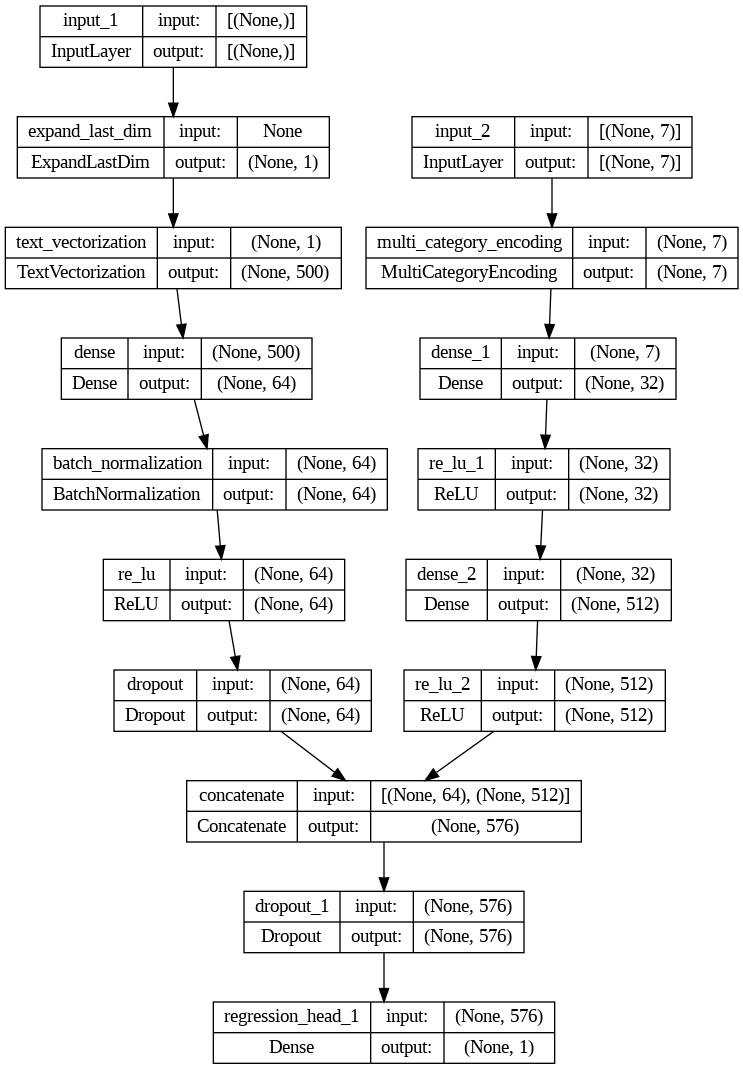

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(type(best_model))  # <class 'tensorflow.python.keras.engine.training.Model'>

<class 'keras.engine.functional.Functional'>


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
# Сохраняем модель
try:
    best_model.save("/content/drive/MyDrive/2. ЦП УФО Деп.Гор.Москвы/model/Ak/model_autokeras_mae", save_format="tf")
except Exception:
    best_model.save("/content/drive/MyDrive/2. ЦП УФО Деп.Гор.Москвы/model/Ak/model_autokeras_mae.h5")

# Загружаем модель
loaded_model = load_model("/content/drive/MyDrive/2. ЦП УФО Деп.Гор.Москвы/model/Ak/model_autokeras_mae", custom_objects=ak.CUSTOM_OBJECTS)

## Делаем предикт

**Скачаем и загрузим модель**

In [ ]:
# Скачаем веса модели
!pip install -U --no-cache-dir gdown --pre
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# Скачиваем архив с обученной моделью
!gdown --no-cookies --fuzzy https://drive.google.com/file/d/1prlbzC9YhjZ4ubHXjfWkg29JOOfV9_hK/view?usp=sharing&export=download

Downloading...
From: https://drive.google.com/uc?id=1prlbzC9YhjZ4ubHXjfWkg29JOOfV9_hK
To: /content/model_autokeras_mae.zip
100% 273k/273k [00:00<00:00, 121MB/s]


In [ ]:
# Распаковываем
!unzip "/content/model_autokeras_mae.zip" -d "/content/model_autokeras_mae"

Archive:  /content/model_autokeras_mae.zip
   creating: /content/model_autokeras_mae/assets/
 extracting: /content/model_autokeras_mae/fingerprint.pb  
  inflating: /content/model_autokeras_mae/keras_metadata.pb  
  inflating: /content/model_autokeras_mae/saved_model.pb  
   creating: /content/model_autokeras_mae/variables/
  inflating: /content/model_autokeras_mae/variables/variables.data-00000-of-00001  
  inflating: /content/model_autokeras_mae/variables/variables.index  


In [ ]:
# Загружаем модель
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/model_autokeras_mae", custom_objects=ak.CUSTOM_OBJECTS)

### Загрузим и подготовим данные для предикта

In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/2. ЦП УФО Деп.Гор.Москвы/Пример_теста_2023.06.19.xlsx')

In [ ]:
df_test

,№ п/п,obj_prg,obj_subprg,obj_key,obj_pwa_key,obj_shortName,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,ДатаначалаБП0,ДатаокончанияБП0,Статуспоэкспертизе,Экспертиза
0,36,Образование,Дошкольные учреждения,020-0684,fea30a7e-2f12-ec11-972f-80d21df2d922,"ДОУ на 125, ТПУ ""Мневники""",1,Предпроектные работы,0,2020-11-03,2022-02-01,2020-11-03,2021-12-29,NaN,NaN


In [ ]:
df

In [ ]:
# сравнение названий столбцов
test_columns_df1 = set(df.columns) - set(df_test.columns) # merged_
test_columns_df2 = set(df_test.columns) - set(df.columns) # merged_

# вывод списка отсутствующих столбцов для каждого датасета
print('Отсутствующие столбцы в df_test:', test_columns_df1)
print('Отсутствующие столбцы в merged_df:', test_columns_df2)

Отсутствующие столбцы в df_test: {'date_report', 'Unnamed: 0'}
Отсутствующие столбцы в merged_df: {'obj_shortName', 'obj_pwa_key'}


In [ ]:
# сравнение названий столбцов
test_columns_df1 = set(df.columns) - set(merged_df.columns) # merged_
test_columns_df2 = set(merged_df.columns) - set(df.columns) # merged_

# вывод списка отсутствующих столбцов для каждого датасета
print('Отсутствующие столбцы в df_test:', test_columns_df1)
print('Отсутствующие столбцы в merged_df:', test_columns_df2)

Отсутствующие столбцы в df_test: set()
Отсутствующие столбцы в merged_df: {'ФактСтрокВып_дн', 'obj_tasks_subprg', 'СтрокВыпДог_дн', 'Кол-во рабочих', 'Площадь', 'Генпроектировщик', 'Генподрядчик', 'состояние площадки', 'obj_tasks'}


In [ ]:
# Объеденим test с общим df
merged_test = pd.merge(df_test, df, how='inner', on=['obj_key']) # , 'Кодзадачи', 'НазваниеЗадачи'
merged_test

In [ ]:
merged_test.columns

Index(['№ п/п_x', 'obj_prg_x', 'obj_subprg_x', 'obj_key', 'obj_pwa_key',
       'obj_shortName', 'Кодзадачи_x', 'НазваниеЗадачи_x',
       'ПроцентЗавершенияЗадачи_x', 'ДатаНачалаЗадачи_x',
       'ДатаОкончанияЗадачи_x', 'ДатаначалаБП0_x', 'ДатаокончанияБП0_x',
       'Статуспоэкспертизе_x', 'Экспертиза_x', 'Unnamed: 0', '№ п/п_y',
       'obj_prg_y', 'obj_subprg_y', 'Кодзадачи_y', 'НазваниеЗадачи_y',
       'ПроцентЗавершенияЗадачи_y', 'ДатаНачалаЗадачи_y',
       'ДатаОкончанияЗадачи_y', 'ДатаначалаБП0_y', 'ДатаокончанияБП0_y',
       'Статуспоэкспертизе_y', 'Экспертиза_y', 'date_report'],
      dtype='object')

In [ ]:
merged_df.columns

Index(['Unnamed: 0', '№ п/п', 'obj_prg', 'obj_subprg', 'obj_key', 'Кодзадачи',
       'НазваниеЗадачи', 'ПроцентЗавершенияЗадачи', 'ДатаНачалаЗадачи',
       'ДатаОкончанияЗадачи', 'ДатаначалаБП0', 'ДатаокончанияБП0',
       'Статуспоэкспертизе', 'Экспертиза', 'date_report', 'состояние площадки',
       'Площадь', 'Генпроектировщик', 'Генподрядчик', 'Кол-во рабочих',
       'ФактСтрокВып_дн', 'СтрокВыпДог_дн', 'obj_tasks', 'obj_tasks_subprg'],
      dtype='object')

In [ ]:
predicted_y = loaded_model.predict(tf.expand_dims(x_test, -1))

In [ ]:
import tensorflow as tf
pred = tf.concat([xTrain_text[15000:20000], xTrainScaled[15000:20000]], axis=1)

In [ ]:
pred

<tf.Tensor: shape=(5000, 2201), dtype=float64, numpy=
array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.37814656],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.37814656],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.37814656],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.3777241 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.37814656],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.37814656]])>

In [ ]:

predicted_y = loaded_model.predict(tf.expand_dims([xTrain_text[15000:20000], xTrainScaled[15000:20000]], -1))
print(predicted_y)

ValueError: ignored

In [ ]:
x_train2_ak#.size

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [2.0, 0.0, 0.0, ..., 6.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 6.0, 0.0, 0.0],
       [2.0, 0.0, 0.0, ..., 6.0, 0.0, 0.0]], dtype=object)

In [ ]:
y_pred = loaded_model.predict([xTrain_text[15000:20000], xTrainScaled[15000:20000]])

In [ ]:
loaded_model.predict([texts_all_np[50000:51000], x_train2_ak[50000:51000]], batch_size=32, verbose=1)

In [ ]:
loaded_model.evaluate([texts_all_np[50000:51000], x_train2_ak[50000:51000]], y=yTrain_ak, batch_size=32, verbose=1)

In [ ]:
x_train2_ak[50000:51000]

array([], shape=(0, 7), dtype=object)

In [ ]:
history = model.fit([xTrain_text[:15000], xTrainScaled[:15000]],
                    yTrainScaled[:15000],
                    epochs= 80,
                    validation_data=([xTrain_text[15000:20000], xTrainScaled[15000:20000]],
                    yTrainScaled[15000:20000]),
                    verbose=1, shuffle=True)